In [8]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
import load_data  # our py file
import create_pslist # our py file

In [9]:
data, z, z_approach, z_retract = load_data.load_data('PHASEdata.csv')
pslist = create_pslist.create_pslist('PHASEdata.csv', 48, 48)

<IPython.core.display.Javascript object>


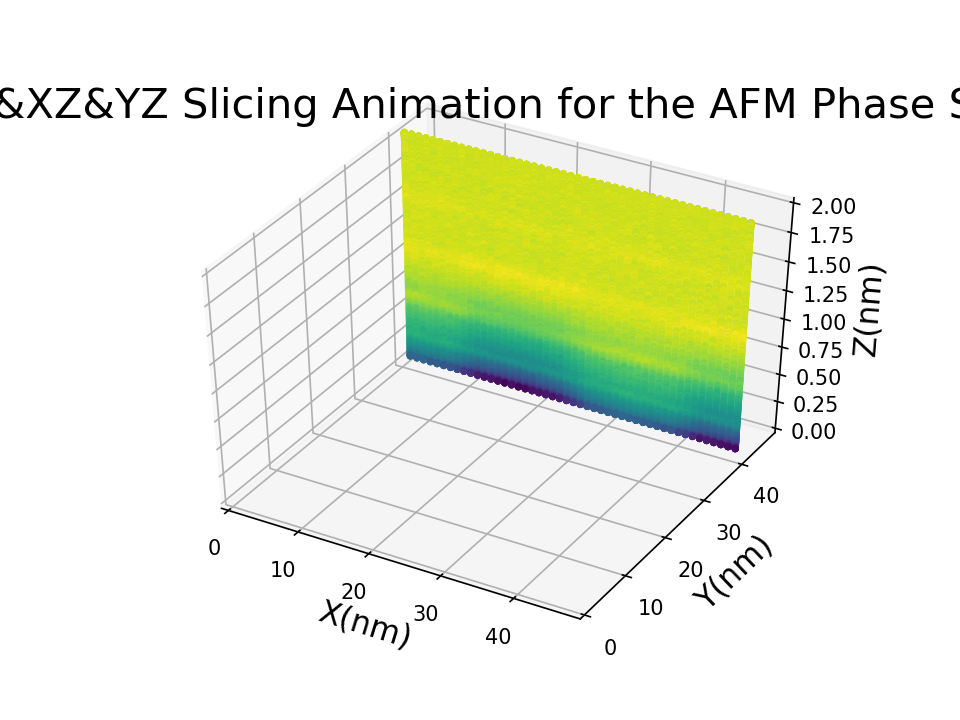

In [10]:
#----------------------------------------------------------------------------------------------------------------
# Set up plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(left=0, right=48)
ax.set_ylim(top=48, bottom=0)
ax.set_zlim(bottom=0, top=2)
ax.set_xlabel('X(nm)', fontsize=15)
ax.set_ylabel('Y(nm)', fontsize=15)
ax.set_zlabel('Z(nm)', fontsize=15)
ax.set_title('XY&XZ&YZ Slicing Animation for the AFM Phase Shift', fontsize=20)
#----------------------------------------------------------------------------------------------------------------
ims = []
for add in np.arange(10):
    a = np.linspace(0, 47, 48)
    b = np.linspace(0, 47, 48)
    c = z_approach[add*50]
    x, z, y = np.meshgrid(a,c,b)
    psasas = []
    for k in range(48):
        for i in range(len(b)):
            B = (pd.DataFrame(pslist[add*50]).transpose().iloc[k])[i]
            psasas.append(B)
    l = psasas
    ims.append((ax.scatter(x, y, z,c=l,s=6),))         #XY slice
    
for add in np.arange(8):
    a = np.linspace(0, 47, 48)
    b = np.linspace(0, 47, 48)[add*6]
    c = z_approach
    x, z, y = np.meshgrid(a,c,b)
    psasas = []
    for k in range(len(c)):
        for i in range(48):
            B = (pd.DataFrame(pslist[k]).transpose().iloc[add*6])[i]
            psasas.append(B)
    l = psasas
    ims.append((ax.scatter(x, y, z,c=l,s=6),))       #XZ slice
    
for add in np.arange(8):
    a = np.linspace(0, 47, 48)[add*6]
    b = np.linspace(0, 47, 48)
    c = z_approach
    x, z, y = np.meshgrid(a,c,b)
    psasas = []
    for k in range(len(c)):
        for i in range(len(b)):
            B = (pd.DataFrame(pslist[k]).iloc[add*6])[i]
            psasas.append(B)
    l = psasas
    
    ims.append((ax.scatter(x, y, z,c=l,s=6),))       #YZ slice

im_ani = animation.ArtistAnimation(fig,ims,interval=500,blit=True)
plt.show()
#im_ani.save('XY&XZ&YZ slice.htm', metadata={'artist':'Guido'})